In [144]:
import numpy as np
import matplotlib.pyplot as plt

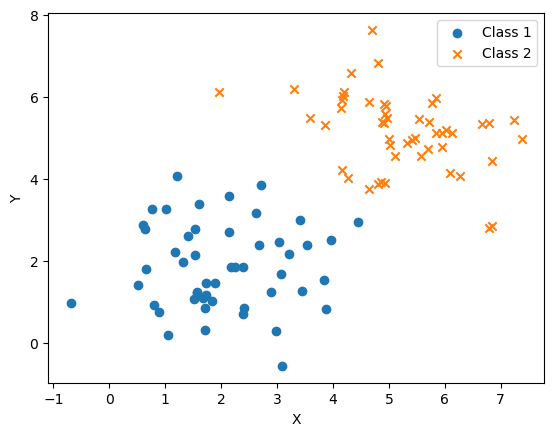

In [150]:
num_points_class1 = 50
x_class1 = np.random.normal(2, 1, num_points_class1)
y_class1 = np.random.normal(2, 1, num_points_class1)

num_points_class2 = 50
x_class2 = np.random.normal(5, 1, num_points_class2)
y_class2 = np.random.normal(5, 1, num_points_class2)

plt.scatter(x_class1, y_class1, label='Class 1', marker='o')
plt.scatter(x_class2, y_class2, label='Class 2', marker='x')

plt.title('')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

In [151]:
x1_combined = np.concatenate([x_class1, x_class2])
x2_combined = np.concatenate([y_class1, y_class2])
ones_column = np.ones((100, 1))

X = np.concatenate([x1_combined.reshape(-1, 1), x2_combined.reshape(-1, 1), ones_column], axis=1)

label = np.concatenate([np.ones((50, 1)), np.zeros((50, 1))])

In [152]:
def logistic(beta, X):
    z = np.dot(X, beta)
    # print(z)
    h = 1 / (1+np.exp(-z))
    return h

def iteration(alpha, w, X):
    h = logistic(w, X)
    beta_new = w + alpha * 0.01 * X.T @ (label - h)
    return beta_new

In [158]:
a=0
b=0
c=0
beta = np.array([[a],
                 [b],
                 [c]])
alpha = 0.1
k = 10000

for i in range(k):
    if i == 0:
        beta_new = iteration(alpha, beta, X)
        continue
    beta_new = iteration(alpha, beta_new, X)

print(f'beta: {beta_new}')

beta: [[-1.52041972]
 [-2.04696539]
 [13.03150844]]


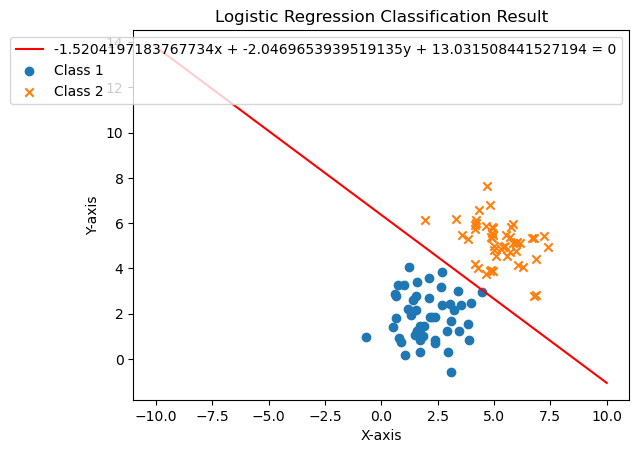

In [159]:
a = beta_new[0,0]
b = beta_new[1,0]
c = beta_new[2,0]

def plot_line(a, b, c):
    x_values = np.linspace(-10, 10, 100)
    y_values = (-a * x_values - c) / b

    plt.plot(x_values, y_values, color='red', label=f'{a}x + {b}y + {c} = 0')
    plt.scatter(x_class1, y_class1, label='Class 1', marker='o')
    plt.scatter(x_class2, y_class2, label='Class 2', marker='x')

    plt.title('Logistic Regression Classification Result')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    plt.legend()

    plt.show()

plot_line(a, b, c)
